In [1]:
import torch
import numpy as np
from matdeeplearn.common import data

/global/homes/s/sidnb13/.conda/envs/matdeeplearn/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
!nvidia-smi

Fri Dec 30 08:21:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-PCI...  On   | 00000000:C3:00.0 Off |                    0 |
| N/A   34C    P0    34W / 250W |      2MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [46]:
dataset = data.get_dataset('/global/cfs/projectdirs/m3641/Sidharth/datasets/MP_data_69K/', )

Pass distances into RBF and replace edge_attr

In [47]:
data_samp = dataset[0].to('cuda')
print(data_samp)

Data(n_atoms=[1], pos=[20, 3], cell=[3, 3], y=-2.166565179824829, z=[20], u=[1, 3], edge_index=[2, 260], edge_weight=[260], cell_offsets=[280, 3], distances=[260], structure_id=[1], x=[20, 114], edge_attr=[260, 50])


In [60]:
from matdeeplearn.preprocessor.transforms import GetY, NumNodeTransform, LineGraphMod, ToFloat
import torch_geometric

In [61]:
compose = torch_geometric.transforms.Compose([NumNodeTransform(), LineGraphMod(), ToFloat()])
compose(data_samp)

Data(n_atoms=[1], pos=[20, 3], cell=[3, 3], y=-2.166565179824829, z=[20], u=[1, 3], edge_index=[2, 260], edge_weight=[260], cell_offsets=[280, 3], distances=[260], structure_id=[1], x=[20, 114], edge_attr=[260, 50], num_nodes=20, edge_index_lg=[3156, 2], x_lg=[260, 50], num_nodes_lg=260, edge_attr_lg=[3156, 1])

In [62]:
data_samp.edge_attr_lg

tensor([[0.0000],
        [0.3436],
        [1.6097],
        ...,
        [1.9024],
        [1.1493],
        [0.0000]], device='cuda:0')

In [48]:
print(data_samp.distances)

tensor([5.5800, 3.1126, 3.5917, 3.3817, 3.3822, 3.1754, 3.1754, 3.5338, 3.5340,
        1.9715, 1.9709, 2.0040, 2.0040, 5.5800, 3.1126, 3.3817, 3.3822, 3.5917,
        3.5338, 3.5340, 3.1754, 3.1754, 1.9715, 1.9709, 2.0040, 2.0040, 3.1126,
        5.5800, 3.6348, 3.5915, 3.5915, 3.5323, 3.5315, 2.1924, 2.1924, 3.2288,
        3.2278, 2.3627, 2.3622, 3.1126, 5.5800, 3.5915, 3.5915, 3.6348, 3.5323,
        3.5315, 2.1924, 2.1924, 2.3627, 2.3622, 3.2288, 3.2278, 3.5917, 3.3817,
        3.6348, 3.5915, 5.5800, 3.3769, 1.8021, 3.8155, 1.8089, 3.6989, 1.7631,
        1.7435, 3.7578, 3.5928, 3.3822, 3.6348, 3.5915, 5.5800, 3.3769, 1.8021,
        1.8083, 3.8156, 1.7631, 3.6989, 1.7444, 3.7574, 3.3817, 3.5917, 3.5915,
        3.6348, 3.3769, 5.5800, 3.8155, 1.8089, 1.8021, 3.6989, 1.7631, 3.7578,
        1.7435, 3.3822, 3.5928, 3.5915, 3.6348, 3.3769, 5.5800, 1.8083, 3.8156,
        1.8021, 1.7631, 3.6989, 3.7574, 1.7444, 3.1754, 3.5323, 1.8021, 1.8083,
        5.5800, 3.5210, 2.9121, 2.9177, 

In [49]:
print(data_samp.edge_weight)

tensor([5.5800, 3.1126, 3.5917, 3.3817, 3.3822, 3.1754, 3.1754, 3.5338, 3.5340,
        1.9715, 1.9709, 2.0040, 2.0040, 5.5800, 3.1126, 3.3817, 3.3822, 3.5917,
        3.5338, 3.5340, 3.1754, 3.1754, 1.9715, 1.9709, 2.0040, 2.0040, 3.1126,
        5.5800, 3.6348, 3.5915, 3.5915, 3.5323, 3.5315, 2.1924, 2.1924, 3.2288,
        3.2278, 2.3627, 2.3622, 3.1126, 5.5800, 3.5915, 3.5915, 3.6348, 3.5323,
        3.5315, 2.1924, 2.1924, 2.3627, 2.3622, 3.2288, 3.2278, 3.5917, 3.3817,
        3.6348, 3.5915, 5.5800, 3.3769, 1.8021, 3.8155, 1.8089, 3.6989, 1.7631,
        1.7435, 3.7578, 3.5928, 3.3822, 3.6348, 3.5915, 5.5800, 3.3769, 1.8021,
        1.8083, 3.8156, 1.7631, 3.6989, 1.7444, 3.7574, 3.3817, 3.5917, 3.5915,
        3.6348, 3.3769, 5.5800, 3.8155, 1.8089, 1.8021, 3.6989, 1.7631, 3.7578,
        1.7435, 3.3822, 3.5928, 3.5915, 3.6348, 3.3769, 5.5800, 1.8083, 3.8156,
        1.8021, 1.7631, 3.6989, 3.7574, 1.7444, 3.1754, 3.5323, 1.8021, 1.8083,
        5.5800, 3.5210, 2.9121, 2.9177, 

In [50]:
from matdeeplearn.preprocessor import helpers

In [51]:
print(data_samp.pos.device)
print(data_samp.cell_offsets.device)
print(data_samp.edge_index.device)

cuda:0
cuda:0
cuda:0


In [52]:
idx_i, idx_j, idx_k, idx_kj, idx_ji = helpers.triplets(
    data_samp.edge_index,
    data_samp.cell_offsets,
    data_samp.x.shape[0]
)

In [11]:
print(idx_kj.shape, idx_ji.shape)

torch.Size([3156]) torch.Size([3156])


In [12]:
angle, idx_kj, idx_ji = helpers.compute_bond_angles(
    data_samp.pos, 
    data_samp.cell_offsets, 
    data_samp.edge_index, 
    data_samp.x.shape[0]
)

In [13]:
print(angle.shape)

torch.Size([3156])


In [14]:
triplet_pairs = torch.stack([idx_kj, idx_ji], dim=0)

In [15]:
row, col = data_samp.edge_index

In [16]:
print(triplet_pairs.shape, triplet_pairs)

torch.Size([2, 3156]) tensor([[  0,  39,  52,  ..., 207, 246, 259],
        [  0,   0,   0,  ..., 259, 259, 259]], device='cuda:0')


In [17]:
positions = data_samp.pos
offsets = data_samp.cell_offsets
n_atoms = len(positions)
n_cells = len(offsets)

In [18]:
data_samp.num_nodes

20

In [19]:
import torch_geometric
from torch_geometric.transforms import LineGraph
from torch_geometric.utils import remove_self_loops

In [20]:
class NumNodeTransform(object):
    def __call__(self, data):
        data.num_nodes = data.x.shape[0]
        return data

In [21]:
lg_transform = LineGraph()
node_num_transform = NumNodeTransform()
compose = torch_geometric.transforms.Compose([node_num_transform, lg_transform])

In [22]:
ds = data_samp.__copy__()
print(ds)
lg = compose(ds)

Data(n_atoms=[1], pos=[20, 3], cell=[3, 3], y=-2.166565179824829, z=[20], u=[1, 3], edge_index=[2, 260], edge_weight=[260], cell_offsets=[280, 3], distances=[260], structure_id=[1], x=[20, 114], edge_attr=[260, 50])


In [23]:
print(lg)

Data(n_atoms=[1], pos=[20, 3], cell=[3, 3], y=-2.166565179824829, z=[20], u=[1, 3], edge_index=[2, 3380], edge_weight=[260], cell_offsets=[280, 3], distances=[260], structure_id=[1], x=[260, 50], num_nodes=260)


Assigning the edge attributes to the line graph at correct indices.

In [24]:
lg.edge_index.shape

torch.Size([2, 3380])

In [25]:
row_lg, col_lg = triplet_pairs.to('cpu')

In [26]:
print(triplet_pairs)

tensor([[  0,  39,  52,  ..., 207, 246, 259],
        [  0,   0,   0,  ..., 259, 259, 259]], device='cuda:0')


How to assign edge attributes to $L(g)$
- Fill line graph edge attributes with zero matrix
- Assign embeddings at respective indices from `edges_to_assign`

In [27]:
from scipy.spatial.distance import cdist

In [28]:
edge_attr_lg = torch.zeros((lg.edge_index.shape[1], 40), device='cuda')

In [29]:
print(edge_attr_lg.shape)

torch.Size([3380, 40])


In [30]:
print(lg.edge_index.T)
print(triplet_pairs.T)

tensor([[  0,   0],
        [  0,   1],
        [  0,   2],
        ...,
        [259, 257],
        [259, 258],
        [259, 259]], device='cuda:0')
tensor([[  0,   0],
        [ 39,   0],
        [ 52,   0],
        ...,
        [207, 259],
        [246, 259],
        [259, 259]], device='cuda:0')


In [31]:
from torch_scatter import scatter_add
from torch_sparse import coalesce
from matdeeplearn.preprocessor.helpers import compute_bond_angles, triplets

In [32]:
def lg_transform(data):
    N = data.num_nodes
    edge_index, edge_attr = data.edge_index, data.edge_attr
    (row, col), edge_attr = coalesce(edge_index, edge_attr, N, N)

    i = torch.arange(row.size(0), dtype=torch.long, device=row.device)
    count = scatter_add(torch.ones_like(row), row, dim=0,
                        dim_size=data.num_nodes)
    cumsum = torch.cat([count.new_zeros(1), count.cumsum(0)], dim=0)

    cols = [
        i[cumsum[col[j]]:cumsum[col[j] + 1]]
        for j in range(col.size(0))
    ]
    rows = [row.new_full((c.numel(), ), j) for j, c in enumerate(cols)]

    row, col = torch.cat(rows, dim=0), torch.cat(cols, dim=0)

    data.edge_index_lg = torch.stack([row, col], dim=0)
    data.x_lg = data.edge_attr
    data.num_nodes_lg = edge_index.size(1)

    # CUSTOM CODE FOR CALCULATING EDGE ATTRIBUTES
    edge_attr_lg = torch.zeros(
        (data.edge_index_lg.shape[1], 1), device='cuda')

    # compute bond angles
    angles, idx_kj, idx_ji = compute_bond_angles(
        data.pos, data.cell_offsets, data.edge_index, data.num_nodes)
    triplet_pairs = torch.stack([idx_kj, idx_ji], dim=0)
    
    print(triplet_pairs.shape, data.edge_index_lg.shape)
    
    return data

In [33]:
data_trans = lg_transform(data_samp)

torch.Size([2, 3156]) torch.Size([2, 3380])


In [34]:
from torch.profiler import profile, record_function, ProfilerActivity

In [44]:
%%time
match_indices = torch.Tensor(np.where(cdist(lg.edge_index.T.cpu(), triplet_pairs.T.cpu()) == 0)[0].reshape(-1, 1)).type(torch.long).squeeze().to('cuda')

del = 2.56e-05
CPU times: user 59.8 ms, sys: 16.3 ms, total: 76.1 ms
Wall time: 91.5 ms


In [45]:
%%time
match_indices_2 = (lg.edge_index.T.unsqueeze(0) == triplet_pairs.T.unsqueeze(1)).sum(dim=2).argmax(dim=1).to('cuda')

del = 2.56e-05
CPU times: user 337 µs, sys: 547 µs, total: 884 µs
Wall time: 599 µs


In [37]:
match_indices_2

tensor([   0,  507,  676,  ..., 2703, 3210, 3379], device='cuda:0')

In [38]:
torch.sort(match_indices).values, torch.sort(match_indices_2).values

(tensor([   0,    1,    2,  ..., 3377, 3378, 3379], device='cuda:0'),
 tensor([   0,    1,    2,  ..., 3377, 3378, 3379], device='cuda:0'))

In [39]:
match_indices, match_indices_2

(tensor([   0,    1,    2,  ..., 3377, 3378, 3379], device='cuda:0'),
 tensor([   0,  507,  676,  ..., 2703, 3210, 3379], device='cuda:0'))

In [40]:
print(lg.edge_index.shape)
print(triplet_pairs.shape)

torch.Size([2, 3380])
torch.Size([2, 3156])


In [41]:
match_indices.shape

torch.Size([3156])

In [42]:
edges = lg.edge_index.T[match_indices.squeeze(-1)]

In [43]:
edge_attr_lg[match_indices.squeeze(-1)] = angles.reshape(-1,1)

NameError: name 'angles' is not defined

In [ ]:
dists = torch.mean(edge_attr_lg, dim=1)

In [ ]:
import matplotlib.pyplot as plt

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 729.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

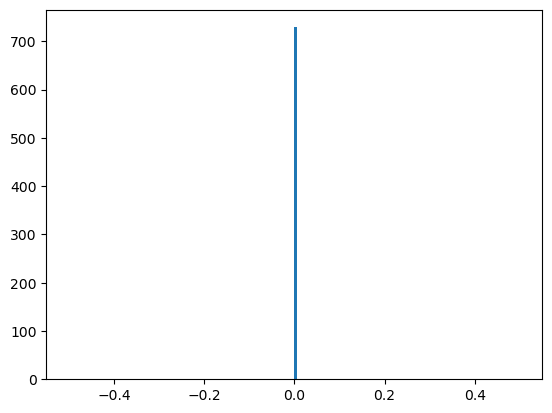

In [ ]:
plt.hist(dists.cpu().numpy(), bins=200)

In [ ]:
from matdeeplearn.preprocessor.transforms import NumNodeTransform, LineGraphMod
from torch_geometric.transforms import Compose

In [ ]:
sample_graph = dataset[5]
print(sample_graph.is_directed())

True


In [ ]:
ds2 = dataset[1]

otf = Compose([NumNodeTransform(), LineGraphMod()])

# print(ds2)
otf(ds2)
# print(ds2)

In [ ]:
print(ds2)

Data(n_atoms=[1], pos=[4, 3], cell=[3, 3], y=-0.9110451936721802, z=[4], u=[1, 3], edge_index=[2, 16], edge_weight=[16], cell_offsets=[20, 3], distances=[16], structure_id=[1], x=[4, 114], edge_attr=[16, 50], num_nodes=4, edge_index_lg=[2, 64], x_lg=[16, 50], num_nodes_lg=16, edge_attr_lg=[64, 1])
